# Navie Bayes

## Import required libraries

In [98]:
import numpy as np  # for the mathematical operations
import pandas as pd #for data manipulation and cleaning
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [101]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')  # Specify encoding if needed
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ['label', 'message']

# Encode labels: 'ham' as 0, 'spam' as 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [103]:
df.head() # print first 5 rows

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   int64 
 1   message  5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [107]:
df.shape

(5572, 2)

## Data Preprocessing

In [110]:
#checking for missing values
df.isnull().sum()

label      0
message    0
dtype: int64

In [112]:
# statistics measures of data
df.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [114]:
df['message'].value_counts() #to check the dataset is balanced or not

message
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                                4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                              

## Exploratory Data Analysis

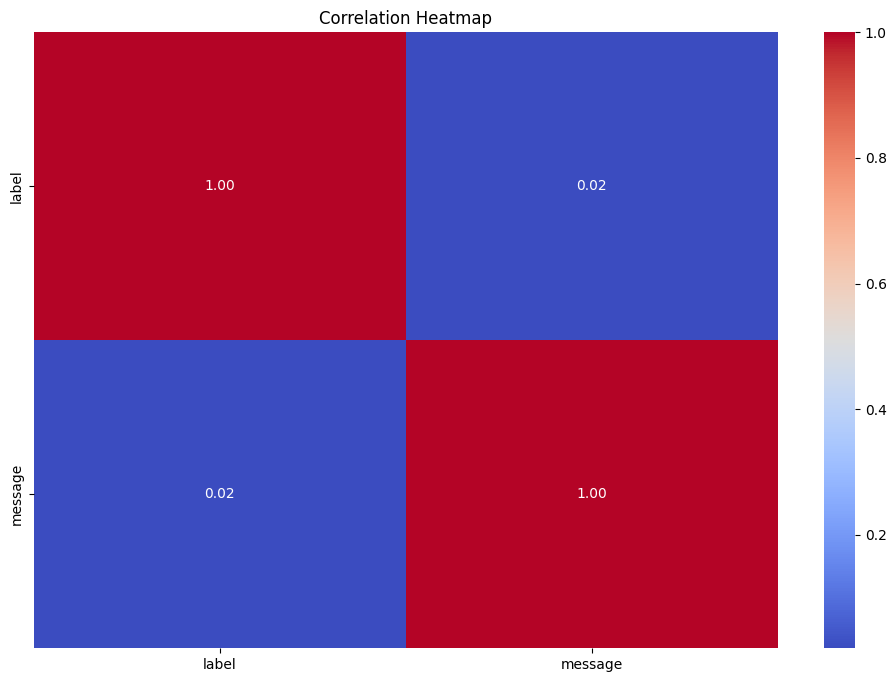

In [117]:
# Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['message'] = label_encoder.fit_transform(df['message'])

# Then recalculate the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Divide data into X and y variable

In [120]:
# Split dataset into features and labels
X = df['message']
y = df['label']

## Split dataset into train and test and Train the model

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')  # Specify encoding if needed
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ['label', 'message']

# Encode labels: 'ham' as 0, 'spam' as 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split dataset into features and labels
X = df['message']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

## Model Prediction

In [140]:
y_pred = nb.predict(X_test_tfidf)

## Model Evaluation

In [147]:
#for evaluting the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[965   0]
 [ 30 120]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.80      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy Score: 0.9730941704035875


# Support Vector Machine

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Specify encoding if needed
df = pd.read_csv('spam.csv', encoding='latin-1') 
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ['label', 'message']

# Encode labels: 'ham' as 0, 'spam' as 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split dataset into features and labels
X = df['message']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Support Vector Machine model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = svm.predict(X_test_tfidf)
print("Support Vector Machine Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Support Vector Machine Performance:
Accuracy: 0.979372197309417
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Logistic Regression

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Specify encoding if needed
df = pd.read_csv(file_path, encoding='latin-1')  
df = df.iloc[:, :2]  # Keep only the first two columns
df.columns = ['label', 'message']

# Encode labels: 'ham' as 0, 'spam' as 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split dataset into features and labels
X = df['message']
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Performance:
Accuracy: 0.9587443946188341
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

